## KL Divergence

KL Divergence, or Kullback-Leibler Divergence, measures the dissimilarity between two probability density functions. 
$$ D(X, Y) = \sum_{x\in D} p_{X}(x) \log\Big(\frac{p_{X}(x)}{p_{Y}(x)}\Big) $$

Some properties of KL Divergence:

- $ D(X, X) = 0$, KLD between a distribution and itself is 0
- $ D(X, Y) >= 0$, KLD is always greater than 0
- $ D(X, Y) \ne D(Y, X)$, KLD is not symmetric

Let's see some of these through PyTorch code

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from torch.distributions import Normal, Uniform
from torch.distributions import kl_divergence

%matplotlib widget

In [2]:
# Let us consider 3 normal distributions
p = Normal(0, 5)
q = Normal(0, 10)
r = Normal(0, 20)

kld_p_p = kl_divergence(p, p)
kld_p_q = kl_divergence(p, q)
kld_q_p = kl_divergence(q, p)
kld_p_r = kl_divergence(p, r)

print('KLD between p and p: {}'.format(kld_p_p))
print('KLD between p and q: {}'.format(kld_p_q))
print('KLD between q and p: {}'.format(kld_q_p))
print('KLD between p and r: {}'.format(kld_p_r))

# As expected, the KL divergence between the 2 identical distributions is 0
assert kld_p_p == 0

# Note that KL divergence is not a distance, which means it is not symmetric
assert kld_p_q != kld_q_p

# KL Divergence between p and q is less than that between p and r.
assert kld_p_q < kld_p_r

KLD between p and p: 0.0
KLD between p and q: 0.3181471824645996
KLD between q and p: 0.8068528175354004
KLD between p and r: 0.9175443649291992


In [3]:
def kld_plot(p, q, r):
    x = np.linspace(-100, 100, 1000)
    p_pdf = p.log_prob(torch.from_numpy(x)).exp()
    q_pdf = q.log_prob(torch.from_numpy(x)).exp()
    r_pdf = r.log_prob(torch.from_numpy(x)).exp()

    kld_p_q = kl_divergence(p, q)
    kld_p_r = kl_divergence(p, r)

    fig, ax = plt.subplots()
    ax.set_title("KLD(p, q) = {:.2f}. KLD(p, r) = {:.2f}".format(kld_p_q , kld_p_r))
    ax.set_ylabel("P(X)")
    ax.set_xlabel("X")
    ax.plot(x, p_pdf, 'green', label="p distribution")
    ax.plot(x, q_pdf, 'blue', label="q distribution")
    ax.plot(x, r_pdf, 'orange', label="r distribution")
    ax.legend()

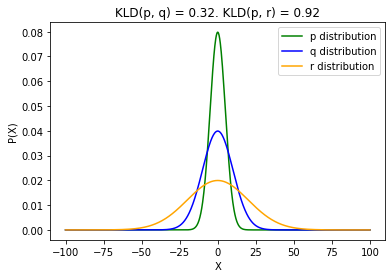

In [4]:
# As expected, KLD between p and q is less than KLD between p and r.
kld_plot(p, q, r)

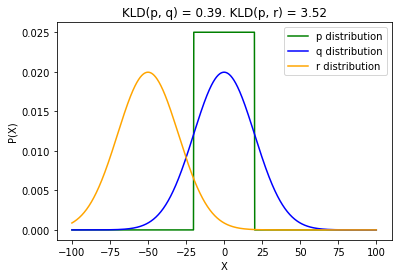

In [5]:
# KL Divergence works for distributions that are not Normal as well.
# Consider the following scenario where p is a Uniform distribution whereas q and r and Normal.

p = Uniform(-20, 20)
q = Normal(0, 20)
r = Normal(-50, 20)

# As expected, KLD)(p, q) < KLD (p, r)
kld_plot(p, q, r)